In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EXPLORE

In [164]:
data = pd.read_csv("cleaned-diabetes.csv")

## Single variables exploratory data analysis

With the interesting question posed, and the dataset collected, we attempt to gain a deeper level of understanding of our dataset by performing structured exploratory data analysis. Using visualizations, we explore first the single variables, then pairwise relationships guided by domain knowledge and the overall question.

### Total cholesterol (`chol`)

Total cholesterol, is made up of low-density lipoprotein cholesterol (LDL) "bad" cholesterol, and high-density lipoprotein cholesterol (HDL) "good" cholesterol. According to the [CDC](https://www.cdc.gov/cholesterol/checked.htm), a total cholesterol less than 200 mg/dL is considered normal. However, it is worth mentioning that this simple blood test can be affected by food and water, so often times it is recommended that the patient not eat or drink anything except water for 9 to 12 hours before the test.

Let's look at the the basic statistics for the variable to get a sense of the readings.

In [165]:
pd.DataFrame(data["chol"].describe())

,chol
count,389.000000
mean,207.275064
std,44.714950
min,78.000000
25%,179.000000
50%,203.000000
75%,229.000000
max,443.000000


The median and mean for total cholesterol are in line with the CDC split between normal and high cholesterol. More specifically, the CDC considers normal total cholesterol as lower than 200 mg/dL, and 200 - 240 mg/dL only being borderline high, and 240+ mg/dL being strictly high.

In [166]:
pd.cut(data["chol"], bins=[0, 200, 240, np.inf], labels=["normal", "borderline", "high"]).value_counts()

normal        184
borderline    131
high           74
Name: chol, dtype: int64

In this dataset, a large majority of inidividuals can be considered to have normal or borderline high total cholesterol. Let's see a histogram:

In [167]:
def a(data: pd.DataFrame, cuts: pd.Series):
    cuts.value_counts(normalize=True)
    for cut in cuts.cat.categories:
        size = data[cuts == cut].sum()
        data[cuts == cut]
        

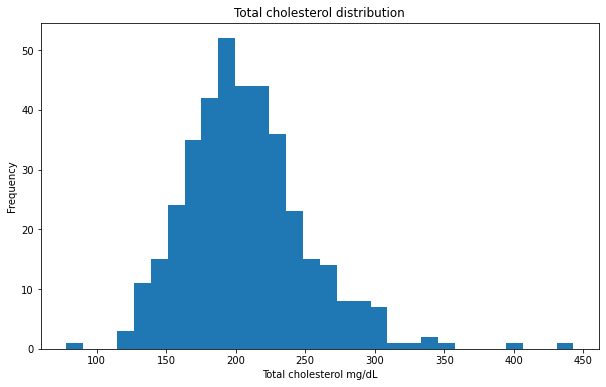

In [168]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data["chol"], bins=30)
axes.set_title("Total cholesterol distribution")
axes.set_xlabel("Total cholesterol mg/dL")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

The overall distrubtion seems fairly symmetric with only a few outliers. The outliers may mean that the distrubtion actually demonstrates a slight right-skew, but overall the values are reasonable for total cholesterol levels.

### Stabilized glucose (`stab.glu`)

Stabalized glucose values, otherwise known as stabalized blood sugar, are blood glucose readings in mg/dL *usually* taken two hours after fasting. Assuming these are fasting blood glucose readings, according to the [CDC](https://www.cdc.gov/diabetes/basics/getting-tested.html) we expect glucose values to be below 100 mg/dL for normal sugars, 100 - 125 mg/dL for prediabetics, and 125+ mg/dL for diabetics. However, a random test without fasting will have ranges of below 140 for normal sugars, 140 - 200 mg/dL for prediabetics, and 200+ mg/dL for diabetics.

Let's look at blood glucose values for this dataset:

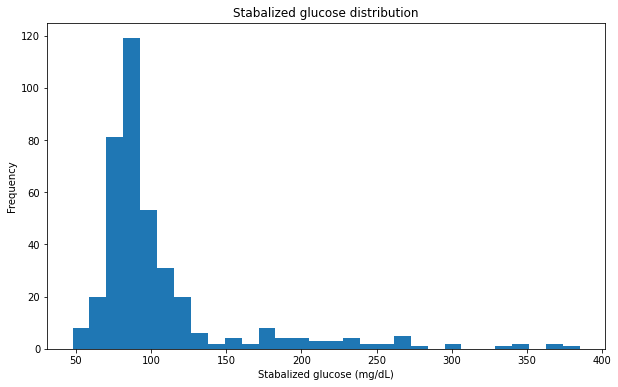

In [170]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data["stab.glu"], bins=30)
axes.set_title("Stabalized glucose distribution")
axes.set_xlabel("Stabalized glucose (mg/dL)")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

The stabalized blood glucose readings certainly exhibit a right-skewed distribution. Let's look at the statistical data to confirm this.

In [171]:
pd.DataFrame(data["stab.glu"].describe())

,stab.glu
count,390.000000
mean,107.338462
std,53.798188
min,48.000000
25%,81.000000
50%,90.000000
75%,107.750000
max,385.000000


With the mean of 106 mg/dL being far greater than the median of 89 mg/dL, we can satisfactorily state that there is a right skew to the distribution. Interestingly, there are also several blood sugars lower than desired -- 48 mg/dL is well within hypoglycemia (low blood sugar) territory.

Let's get a sense for whether this blood glucose values are recorded after the individuals have fasted, or if these are glucose values that could be perturbeted by recent consumption of food or drink. First, we'll assume the readings were taken after the individuals fasted.

In [172]:
pd.DataFrame(pd.cut(data["stab.glu"], bins=[0, 100, 125, np.inf], labels=["normal", "borderline", "high"]).value_counts(normalize=True))

,stab.glu
normal,0.679487
borderline,0.166667
high,0.153846


60 individuals, or around 14% would have glucose readings considered diabetic. The [CDC](https://www.cdc.gov/diabetes/pdfs/data/statistics/national-diabetes-statistics-report.pdf) reported in 2018 that a crude estimate of the number of undiagnosed and diagnosed diabetics was between 12 - 14.1% in the United States (95% confidence interval). Our data indicates that roughly 14.8 of the patients would be considered diabetic.

In [173]:
pd.DataFrame(pd.cut(data["stab.glu"], bins=[0, 140, 200, np.inf], labels=["normal", "borderline", "high"]).value_counts(normalize=True))

,stab.glu
normal,0.869231
high,0.074359
borderline,0.056410


On the otherhand, 12.5% of the individuals in the dataset would be considered prediabetic or diabetic. It is inconclusive as to the reliability and reproducibility of this reading, as well as the true manner in which the information was gathered. Especially considering the postprandial time variable (`lab.ppn`), alongside the fickleness of a blood glucose reading may reduce the value of this variable.

### High-density lipoprotein (`hdl`)

High-density lipoprotein is often referred to as the "good" cholesterol -- where total cholesterol was the "bad" and "good" cholesterol combined. The [CDC](https://www.cdc.gov/cholesterol/checked.htm) considers 40 mg/dL or more sufficient to help clear arteries of cholesterol buildup, anything less would be considered poor.

In [174]:
data["hdl"].describe()

count    389.000000
mean      50.267352
std       17.301317
min       12.000000
25%       38.000000
50%       46.000000
75%       59.000000
max      120.000000
Name: hdl, dtype: float64

Other than some very high HDL readings, the "good" cholesterol readings are well within normal range for the general population of the United States. Nearly 75% of the individuals in this dataset are within the acceptable range for LDL. Notably, the maximum is quite high. Let's observe any additional outliers:

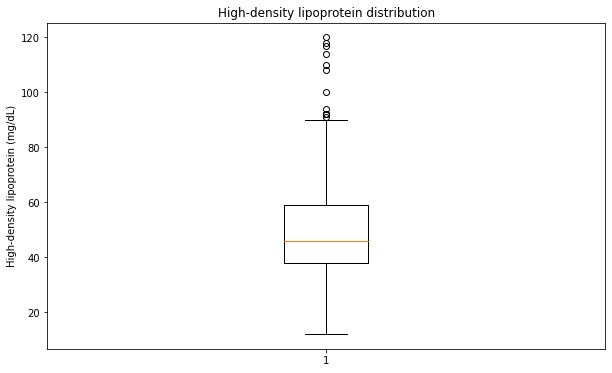

In [175]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.boxplot(data["hdl"].dropna())
axes.set_title("High-density lipoprotein distribution")
axes.set_ylabel("High-density lipoprotein (mg/dL)")

plt.show()
plt.close()

The excellent cholesterols above 60 mg/dL are certainly outliers, but considering this value is bounded by 0, it is not unreasonable. 120 mg/dL for a HDL cholesterol is fantastic, but it should be noted that most benefits of high "good" cholesterol tend to level off around 90 mg/dL.

### Cholesterol ratio (`ratio`)

Cholesterol ratio is the ratio of total cholesterol and HDL. Since we have already performed analysis on total cholesterol and HDL, we should see a near identical distribution and values amonst the ratio of the two perviously encountered variables and the `ratio`.

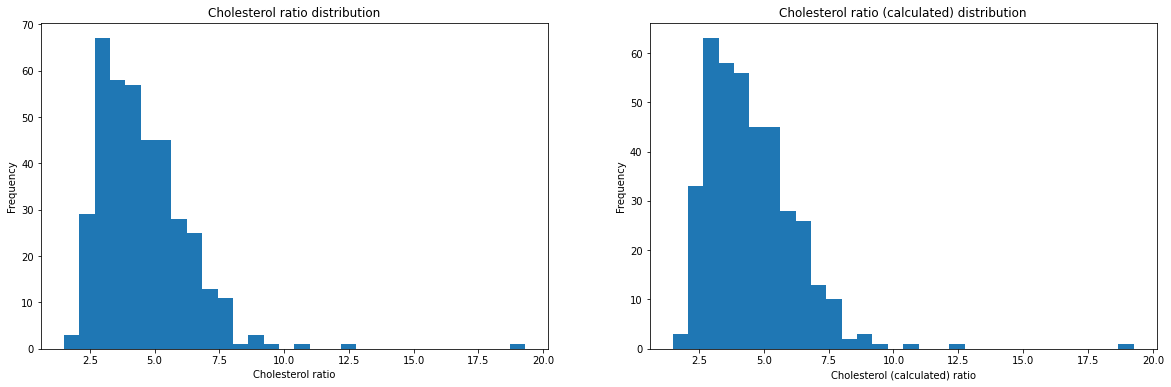

In [176]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(data["ratio"], bins=30)
axes.set_title("Cholesterol ratio distribution")
axes.set_xlabel("Cholesterol ratio")
axes.set_ylabel("Frequency")

axes = figure.add_subplot(1, 2, 2)
axes.hist(data["chol"] / data["hdl"], bins=30)
axes.set_title("Cholesterol ratio (calculated) distribution")
axes.set_xlabel("Cholesterol (calculated) ratio")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

We previously observed a right-skewed distribtuion among both total cholesterol and HDL, so the ratio of the two appropriately follows the distribution skew. The artifacts of outliers from the total cholesterol variable remain, now just scaled down due to the division. These values are within the appropriate range for total cholesterol, and seem to be consistent with the calculated ratio.

### Glycosylated hemoglobin (`glyhb`)

The [glycosylated hemoglobin](https://en.wikipedia.org/wiki/Glycated_hemoglobin), a diagnostic test often referred to as simply a "hemoglobin A1c", is measured primarily to determine the three-month average blood sugar level. This makes this measure far more reliable than the instantaneous measure of blood glucose values with the stabilized glucose value. Let's look at the histogram for A1c levels:

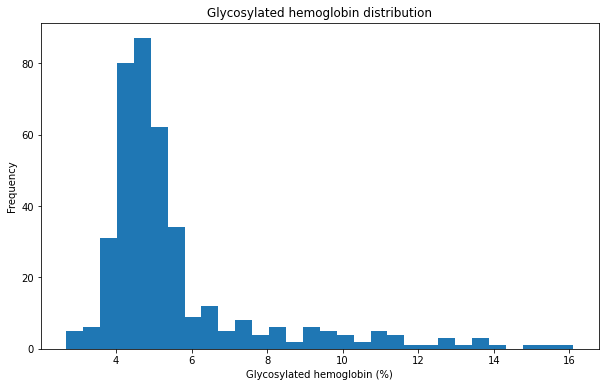

In [177]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data["glyhb"], bins=30)
axes.set_title("Glycosylated hemoglobin distribution")
axes.set_xlabel("Glycosylated hemoglobin (%)")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

Once again using the [CDC](https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html) for reference, a normal A1c level is anything below 5.7%. Prediabetics would have A1cs between 5.7 - 6.4%, and those individuals with a level of 6.5% or more indicates diabetes.

It seems there are almost two stories being told in this distribution. One, the symmetric distribution centered about 5. Two, a long tail of outliers starting at the split-point of 6.4%. Let's plot the two seperately to observe the individual patterns.

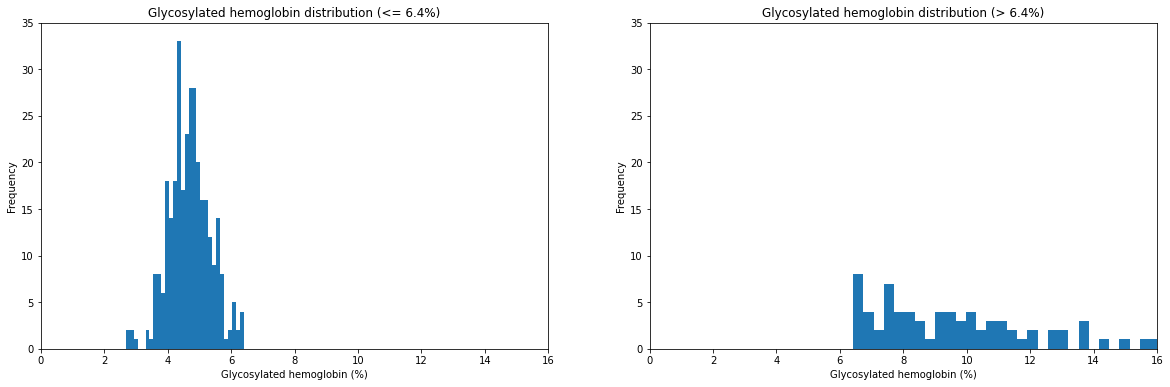

In [178]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(data[data["glyhb"] <= 6.4]["glyhb"], bins=30)
axes.set_title("Glycosylated hemoglobin distribution (<= 6.4%)")
axes.set_xlabel("Glycosylated hemoglobin (%)")
axes.set_ylabel("Frequency")
axes.set_xlim((0,16))
axes.set_ylim((0,35))

axes = figure.add_subplot(1, 2, 2)
axes.hist(data[data["glyhb"] > 6.4]["glyhb"], bins=30)
axes.set_title("Glycosylated hemoglobin distribution (> 6.4%)")
axes.set_xlabel("Glycosylated hemoglobin (%)")
axes.set_ylabel("Frequency")
axes.set_xlim((0,16))
axes.set_ylim((0,35))

plt.show()
plt.close()

Lopping off the diabetic-leaning portion of the distribution produces a quite symmetric distribtuion about the mean of 4.75%. The latter diabetic portion demonstrates a left-skewed distribution. Diabetics who are considered to have excellent control have A1Cs less than 7.0%. While this is interesting, the overall histogram skew more confirms the CDC splits than anything else. This could be a good indication that linear modeling may fail with this as the target variable, as the *groupings* are more significant than the values themselves.

As this A1c is described as a test to measure the three-month average blood sugar of an individual, it is often represented as an estimated average glucose, or eAG. While this is primarily only to improve the discussion of glucose control with patients, it is helpful to compare, as the stabilized glucose reading variable is measured as mg / dL, just as eAG.

The conversion given by the [American Diabetes Association](https://professional.diabetes.org/diapro/glucose_calc) is:

$$
\text{eAG} = 28.7 * \text{A1c} – 46.7.
$$

In [179]:
data["eAG"] = 28.7 * data["glyhb"] - 46.7

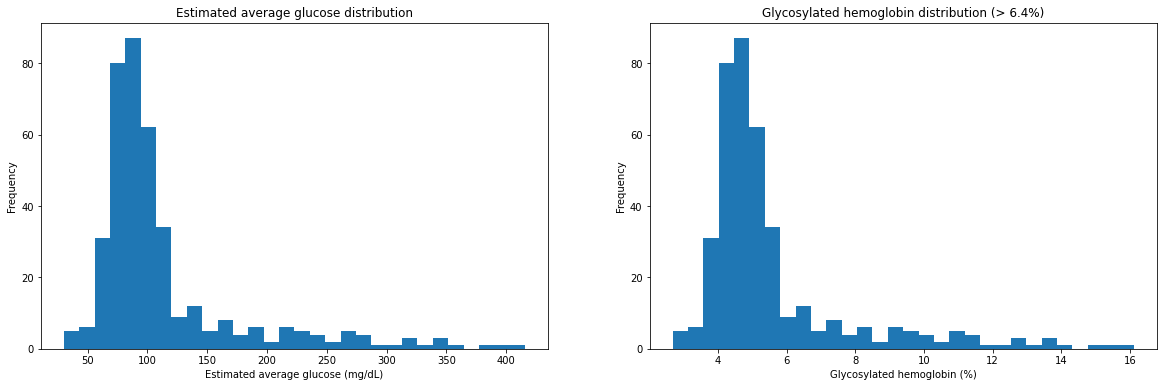

In [180]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(data["eAG"], bins=30)
axes.set_title("Estimated average glucose distribution")
axes.set_xlabel("Estimated average glucose (mg/dL)")
axes.set_ylabel("Frequency")

axes = figure.add_subplot(1, 2, 2)
axes.hist(data["glyhb"], bins=30)
axes.set_title("Glycosylated hemoglobin distribution (> 6.4%)")
axes.set_xlabel("Glycosylated hemoglobin (%)")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

Our assumption that the stabalized glucose values will compare well to the A1c values seems correct. The same distribution is observed across both variables, leaving the A1c as the optimal variable when it comes to utilization. Any hour-to-hour discrepancy is avoided by essentially getting an average of the past three months free of cost through measure of the A1c.

### Age (`age`)

Age and overall health are often highly correlated, so ensuring a broad age-group will help further our exploratory data analysis as well as help produce an accurate model.

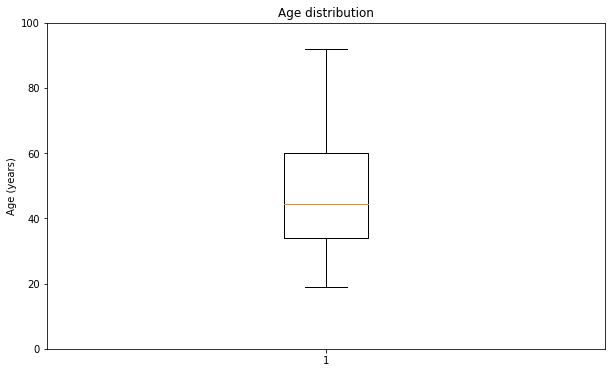

In [181]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.boxplot(data["age"].dropna())
axes.set_title("Age distribution")
axes.set_ylabel("Age (years)")
axes.set_ylim((0,100))

plt.show()
plt.close()

Other than likely being limited to only adults (those 18+), the dataset has a reflective distribution of ages.

In [182]:
data["age"].describe()

count    390.000000
mean      46.774359
std       16.435911
min       19.000000
25%       34.000000
50%       44.500000
75%       60.000000
max       92.000000
Name: age, dtype: float64

The oldest individual in the dataset is 92 years old, with the youngest being 19.

### Gender (`gender`)

Another balance that is critical when observing health-related data is gender. Let's look at the relative frequency breakdown of males and females for this dataset:

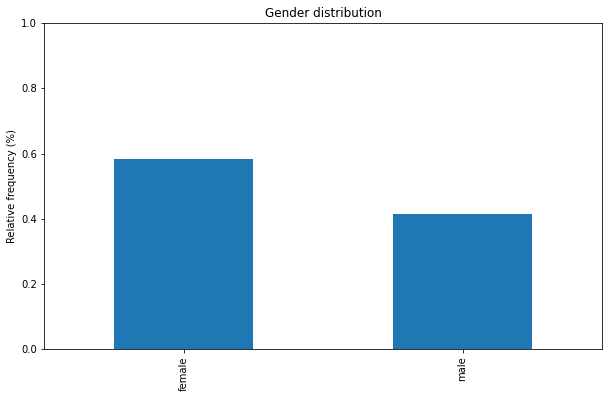

In [183]:
figure = plt.figure(figsize=(10, 6))

axes = data["gender"].value_counts(normalize=True).plot.bar()
axes.set_title("Gender distribution")
axes.set_ylabel("Relative frequency (%)")
axes.set_ylim((0,1))

plt.show()
plt.close()



Men are more likely to get type 2 diabetes at a lower weight than women, according to the [CDC](https://www.cdc.gov/diabetes/library/features/diabetes-and-men.html). This means, with a more female dominant dataset such as this one, conclusions and models portability to the general population may be hindered.

### Height (`height`) and weight (`weight`)

The height is measured in inches, while weight is measured in pounds. Let's look at the two fairly straightforward variables distributions:

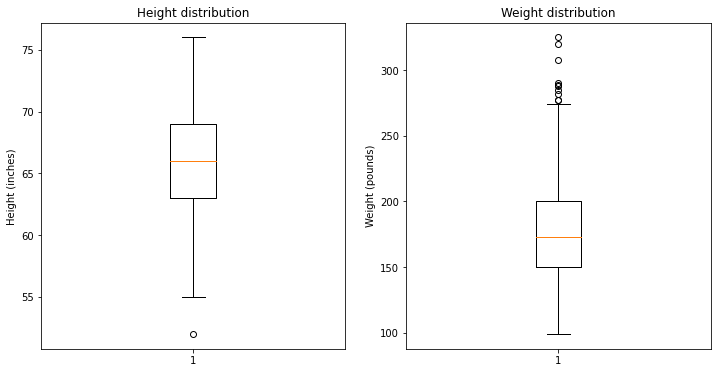

In [184]:
figure = plt.figure(figsize=(12, 6))

axes = figure.add_subplot(1, 2, 1)
axes.boxplot(data["height"].dropna())
axes.set_title("Height distribution")
axes.set_ylabel("Height (inches)")

axes = figure.add_subplot(1, 2, 2)
axes.boxplot(data["weight"].dropna())
axes.set_title("Weight distribution")
axes.set_ylabel("Weight (pounds)")

plt.show()
plt.close()

There isn't much to say about these variables other than the fact that they are well within normal limits. It might be useful to us to calculate the individual's BMI based on these measurements. Since these measurements are imperical, we will have to convert the calculation as well:

In [185]:
data["bmi"] = 703 * (data["weight"] / data["height"]**2)

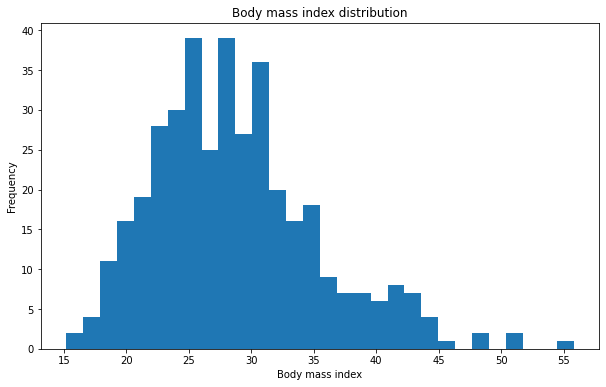

In [186]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data["bmi"], bins=30)
axes.set_title("Body mass index distribution")
axes.set_xlabel("Body mass index")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

The [CDC](https://www.cdc.gov/obesity/adult/defining.html) defines obesity as an individual with a BMI over 30, with BMIs between 25 - 30 being borderline "overweight". Obesity is often considered an indicator of diabetes, so having the BMI on hand during model exploration will be beneficial.

### Frame (`frame`)

Body frame size is determined by a person's wrist circumference in relation to their height. Little is known about the specific breakdown of this categorical variable.

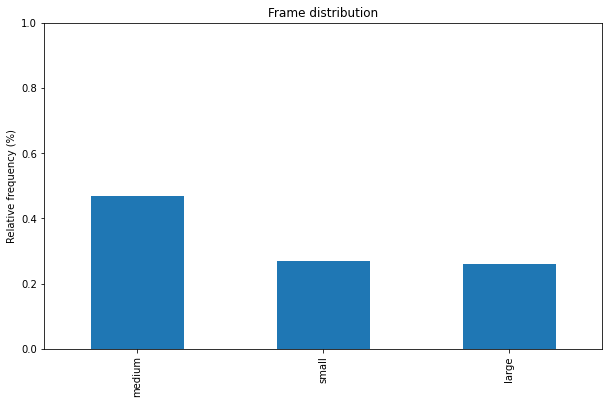

In [187]:
figure = plt.figure(figsize=(10, 6))

axes = data["frame"].value_counts(normalize=True).plot.bar()
axes.set_title("Frame distribution")
axes.set_ylabel("Relative frequency (%)")
axes.set_ylim((0,1))

plt.show()
plt.close()

Without additional domain knowledge, these results are difficult to describe. Certainly we can say 50% of the dataset consists of "medium" frame individuals, with the other 50% split evenly by "small" and "large" frame individuals.

### Systolic blood pressure (`bp.s`) and diastolic blood pressure (`bp.d`)

Blood pressure is measured by two readings in mm/Hg: the **systolic blood pressure** measures the pressure in your arteries when your heart beats, whereas **diastolic blood pressure** measures the pressure in your arteries when your heart rests between beats. According to the [CDC](https://www.cdc.gov/bloodpressure/about.htm), the higher an individual's blood pressure levels are, the "more risk they have for other health problems, such as heart disease, heart attack, and stroke".

Per the [American Heart Association](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings), the breakdown of blood pressure readings is as follows:

| Blood pressure category | Systolic (mm/Hg) | and/or | Diastolic (mm/Hg) |
|-------------------------|------------------|--------|-------------------|
| normal                  | < 120            | and    | < 80              |
| elevated                | 120 – 129        | and    | < 80              |
| hypertension stage 1    | 130 – 139        | and    | 80 - 89           |
| hypertension stage 2    | >= 140            | or     | >= 90              |
| hypertensive crisis     | >= 180            | and    | >= 120             |

So, hopefully nobody was experiencing a hypertensive crisis while being screened...

In [188]:
data[(data["bp.s"] >= 180) & (data["bp.d"] >= 120)]

,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,waist,hip,time.ppn,bp.s,bp.d,eAG,bmi
163,212.0,79,49.0,4.3,5.49,51,female,65.0,145.0,small,38.0,42.0,60.0,235.0,120.0,110.862993,24.126627


That's not good. Let's see how many individuals have "normal" or "elevated" blood pressures:

In [189]:
len(data[(data["bp.s"] < 130) & (data["bp.d"] < 80)])

93

Just under a quarter in this dataset have "normal" or "elevated" blood pressures. According to the [CDC](https://www.cdc.gov/bloodpressure/facts.htm), the United States overall sees that number closer to 50%. Perhaps the demographic or race play a role in the overall higher than general blood pressures.

### Waist (`waist`) and hip (`hip`)

Just as with height and weight, there isn't much to say about these variables other than the fact that they are well within normal limits. Let's look at a histogram for both:

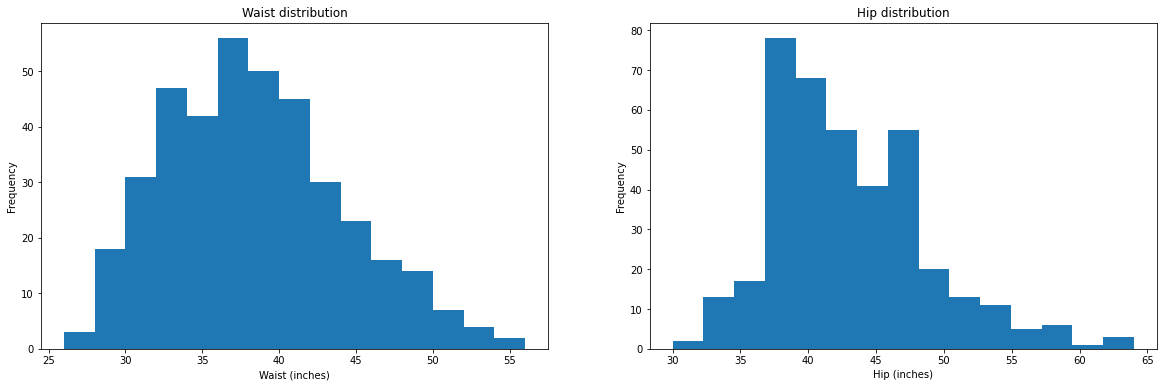

In [190]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(data["waist"], bins=15)
axes.set_title("Waist distribution")
axes.set_xlabel("Waist (inches)")
axes.set_ylabel("Frequency")

axes = figure.add_subplot(1, 2, 2)
axes.hist(data["hip"], bins=15)
axes.set_title("Hip distribution")
axes.set_xlabel("Hip (inches)")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

Waist and hip distributions seem somewhat skewed, but well within reasonable limits for the variables. Studies have linked the waist-to-hip ratio as a possible predictor of diabetes, like one published in [Diabetes Care](https://www.endocrinologyadvisor.com/home/topics/diabetes/type-2-diabetes/t2d-risk-predicted-using-waist-to-hip-ratio/).

> Waist-to-hip ratio was found to be the most reliable predictor of type 2 diabetes (T2D) among all individuals participating in a cross-sectional study, regardless of ethnicity, according to research published in Diabetes Care.

We will include this measurement for use during model exploration:

In [191]:
data["waist_hip"] = data["waist"] / data["hip"]

### Lab postprandial time (`time.ppn`)

Lastly, we have the lab postprandial time, measured in minutes. Because absorption of food persists for 5 – 6 hours after a meal in both diabetic and nondiabetic individuals, stabalized glucose readings, among other medical tests can sometimes be affected by the amount of fasting prior to labwork.

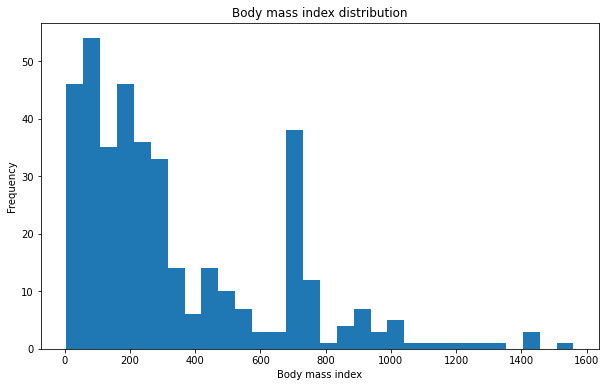

In [192]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data["time.ppn"], bins=30)
axes.set_title("Body mass index distribution")
axes.set_xlabel("Body mass index")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

A majority of the individuals had a fasting time of less than 4 hours. The notable distribution peak near 720 is likely a side-effect of data entry, as marks a clean 12 hours. We are uncertain how large an effect this fasting time has on the health data collected -- worth further investigation.

## Pairwise variable exploratory data analysis

Due to the combinatorial explosion of our dataset's 19 variables, we limit the pairwise exploration to relationships relevant to the question being asked.

#### `stab.glu`, `ratio` and `time.ppn`

First, let's explore the lab postprandial time variable a bit more by performing some pairwise analysis. We'll take a look at two of the variables that might be affected by lack of fasting prior to data collection: stabilized glucose and cholesterol ratio.

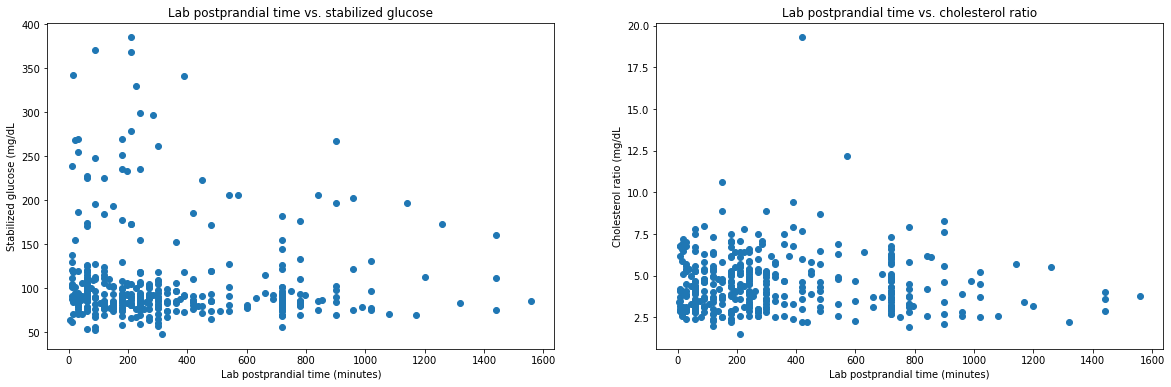

In [193]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.scatter(data["time.ppn"], data["stab.glu"])
axes.set_ylabel("Stabilized glucose (mg/dL")
axes.set_xlabel("Lab postprandial time (minutes)")
axes.set_title("Lab postprandial time vs. stabilized glucose")

axes = figure.add_subplot(1, 2, 2)
axes.scatter(data["time.ppn"], data["ratio"])
axes.set_ylabel("Cholesterol ratio (mg/dL")
axes.set_xlabel("Lab postprandial time (minutes)")
axes.set_title("Lab postprandial time vs. cholesterol ratio")

plt.show()
plt.close()

Interestly, the variation in cholesterol ratio isn't impacted much by lab postprandial time, but stabilized glucose certainly sees more variation with shorter lab postprandial times. Perhaps this variability is an indicator of diabetes. Let's see the lab postprandial time vs. stabilized glucose for diabetics and non-diabetics seperately.

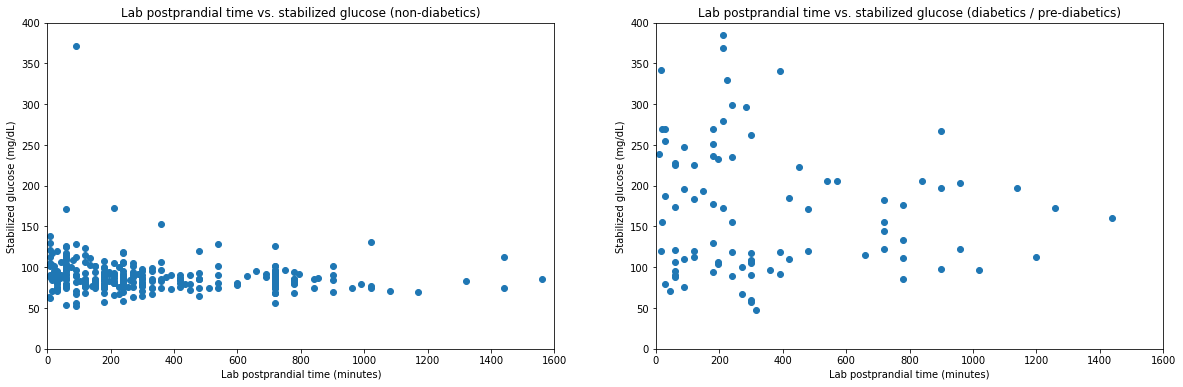

In [194]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.scatter(data[data["glyhb"] <= 5.7]["time.ppn"], data[data["glyhb"] <= 5.7]["stab.glu"])
axes.set_ylabel("Stabilized glucose (mg/dL)")
axes.set_xlabel("Lab postprandial time (minutes)")
axes.set_title("Lab postprandial time vs. stabilized glucose (non-diabetics)")
axes.set_xlim((0,1600))
axes.set_ylim((0,400))

axes = figure.add_subplot(1, 2, 2)
axes.scatter(data[data["glyhb"] > 5.7]["time.ppn"], data[data["glyhb"] > 5.7]["stab.glu"])
axes.set_ylabel("Stabilized glucose (mg/dL)")
axes.set_xlabel("Lab postprandial time (minutes)")
axes.set_title("Lab postprandial time vs. stabilized glucose (diabetics / pre-diabetics)")
axes.set_xlim((0,1600))
axes.set_ylim((0,400))

plt.show()
plt.close()

Diabetics see more much more variability post prandial, this variation could certainly be an indication of diabetes -- it's certainly an indication of uncontrolled diabetes. Unfortunately, instilling a sense of variation isn't exactly something we can "plug in" to our models, but we can simplify this discovery a touch: higher stabilized glucose values are a likely predictor of diabetes.

#### `waist`/`hip` and `glyhb`

Next, we move to the infamous waist-to-hip ratio as a predictor of diabetes. This has often been considered a significant direct relationship to type II diabetes. Even considered more correlated than BMI and diabetes risk according to the [Annals of Internal Medicine](https://qz.com/546920/researchers-say-apple-bodies-are-even-worse-for-us-than-high-bmis/) research study.

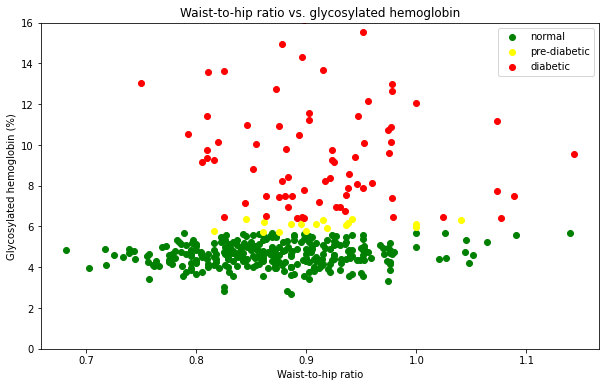

In [195]:
subsets = [
    data[data["glyhb"] <= 5.7], 
    data[(data["glyhb"] > 5.7) & (data["glyhb"] <= 6.4)], 
    data[data["glyhb"] > 6.4]
]
colors = ["green", "yellow", "red"]
labels = ["normal", "pre-diabetic", "diabetic"]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
for subset, color, label in zip(subsets, colors, labels):
    axes.scatter(subset["waist_hip"], subset["glyhb"], color=color, label=label)
axes.set_ylabel("Glycosylated hemoglobin (%)")
axes.set_xlabel("Waist-to-hip ratio")
axes.set_title("Waist-to-hip ratio vs. glycosylated hemoglobin")
axes.set_ylim((0,16))
axes.legend()

plt.show()
plt.close()

At least with our data, this relationship just doesn't seem to hold true. The diabetics are nearly just as evenly distributed as non-diabetics. There is some lack of presence of diabetics with a waist-to-hip ratio less than .8, but overall they seem to be grouped around around the same mean as non-diabetics but for a touch above.

#### `gender`, `weight` and `glyhb`

We previously stated men are more likely to get type 2 diabetes at a lower weight than women, according to the [CDC](https://www.cdc.gov/diabetes/library/features/diabetes-and-men.html). Let's explore the relationship in this dataset, observing the relationship between weight and A1c, with particular focus on gender.

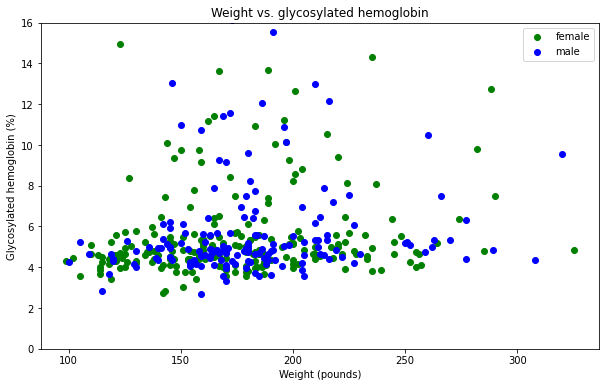

In [196]:
subsets = [
    data[data["gender"] == "female"],
    data[data["gender"] == "male"]
]
colors = ["green", "blue"]
labels = ["female", "male"]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
for subset, color, label in zip(subsets, colors, labels):
    axes.scatter(subset["weight"], subset["glyhb"], color=color, label=label)
axes.set_ylabel("Glycosylated hemoglobin (%)")
axes.set_xlabel("Weight (pounds)")
axes.set_title("Weight vs. glycosylated hemoglobin")
axes.set_ylim((0,16))
axes.legend()

plt.show()
plt.close()

It may be, but visually, the relationship doesn't seem to be strongly present in this dataset. Let's simply compare the number of males with diabetes to the number of females to see if that is an indicator:

In [197]:
pd.crosstab(data["gender"], data["glyhb"] > 6.4, normalize=True, colnames=['diabetic'])

diabetic,False,True
gender,,
female,0.484615,0.100000
male,0.330769,0.084615


Yep, unfortunately because this dataset consists of more women, using gender as a predictor may be unreliable if used outside the context of this dataset. We expect more men to have diabetes than women, but that isn't the case in this dataset. This dataset consists of primarily African Americans, so the generalization could be that fewer men are diabetic amongst African Americans specifically, but the amount of data in this dataset isn't enough to be confident in that.

#### `age` and `glyhb`

We expect diabetes to be more prevelant amongst older individuals, let's look at a scatter plot comparing the two:

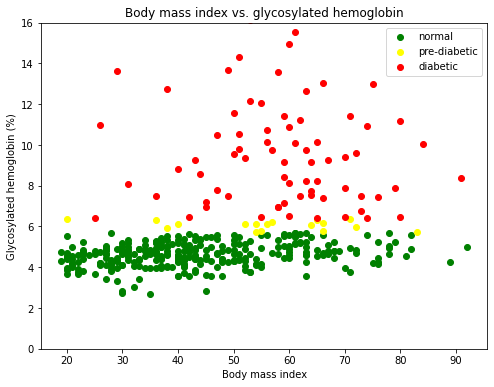

In [198]:
subsets = [
    data[data["glyhb"] <= 5.7], 
    data[(data["glyhb"] > 5.7) & (data["glyhb"] <= 6.4)], 
    data[data["glyhb"] > 6.4]
]
colors = ["green", "yellow", "red"]
labels = ["normal", "pre-diabetic", "diabetic"]

figure = plt.figure(figsize=(8, 6))

axes = figure.add_subplot(1, 1, 1)
for subset, color, label in zip(subsets, colors, labels):
    axes.scatter(subset["age"], subset["glyhb"], color=color, label=label)
axes.set_ylabel("Glycosylated hemoglobin (%)")
axes.set_xlabel("Body mass index")
axes.set_title("Body mass index vs. glycosylated hemoglobin")
axes.set_ylim((0,16))
axes.legend()

plt.show()
plt.close()

There is a clear relationship between age and diabetes. It's easy to get distracted by the mediocracy of normal individuals, but focusing only on the diabetics, we can see clearly an older subset of individuals have diabetes in this dataset.

#### `ratio` and `glyhb`

Let's next observe the relationship between cholesterol ratio and glycosylated hemoglobin. We expect those with higher  ratios to tend to have higher A1cs.

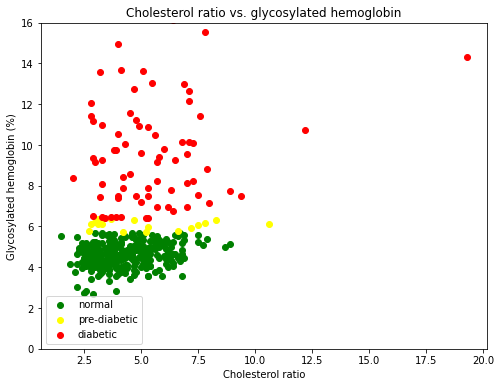

In [199]:
subsets = [
    data[data["glyhb"] <= 5.7], 
    data[(data["glyhb"] > 5.7) & (data["glyhb"] <= 6.4)], 
    data[data["glyhb"] > 6.4]
]
colors = ["green", "yellow", "red"]
labels = ["normal", "pre-diabetic", "diabetic"]

figure = plt.figure(figsize=(8, 6))

axes = figure.add_subplot(1, 1, 1)
for subset, color, label in zip(subsets, colors, labels):
    axes.scatter(subset["ratio"], subset["glyhb"], color=color, label=label)
axes.set_ylabel("Glycosylated hemoglobin (%)")
axes.set_xlabel("Cholesterol ratio")
axes.set_title("Cholesterol ratio vs. glycosylated hemoglobin")
axes.set_ylim((0,16))
axes.legend()

plt.show()
plt.close()

Some of the variation in A1c values can be described by cholesterol level, but the outliers may warp our perception of this relationship. The grouping of diabetics and pre-diabetics has a slightly higher cholesterol ratio than the normal grouping.

#### `stab.glu` and `glyhb`

Lastly, let's look at the relationship between stabalized glucose and A1c. From previous data exploration, we know these variables are highly correlated. That is very logical, as A1c is simply a three-month estimation of glucose readings to the single snapshot in time reading that is the stabilized glucose reading. Let's look at the relationship graphically:

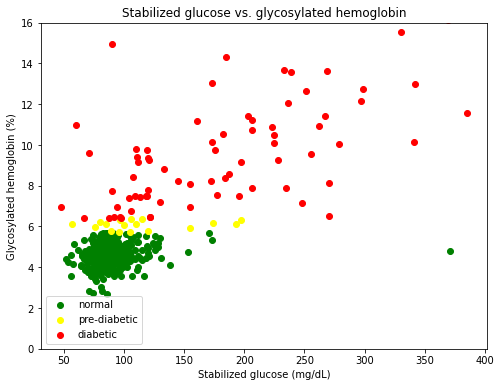

In [200]:
subsets = [
    data[data["glyhb"] <= 5.7], 
    data[(data["glyhb"] > 5.7) & (data["glyhb"] <= 6.4)], 
    data[data["glyhb"] > 6.4]
]
colors = ["green", "yellow", "red"]
labels = ["normal", "pre-diabetic", "diabetic"]

figure = plt.figure(figsize=(8, 6))

axes = figure.add_subplot(1, 1, 1)
for subset, color, label in zip(subsets, colors, labels):
    axes.scatter(subset["stab.glu"], subset["glyhb"], color=color, label=label)
axes.set_ylabel("Glycosylated hemoglobin (%)")
axes.set_xlabel("Stabilized glucose (mg/dL)")
axes.set_title("Stabilized glucose vs. glycosylated hemoglobin")
axes.set_ylim((0,16))
axes.legend()

plt.show()
plt.close()

This is the clearest indicator of diabetes we've yet to see among our 19 variables. To some this may be somewhat underwhelming, as they are nearly the same metric. However, it is our goal now to determine means of improving the prediction reliability of this somewhat fickle test, by incorporating other indicating variables. 

Let's save any additions or transormations we made to the dataset: 

In [201]:
data.to_csv("explored-diabetes.csv", index=False)